In [1]:
from sav_extract import sav_extract
filename='iris2model.sav'
iris2model=sav_extract(filename)

Your file iris2model.sav contains an inversion of a single raster and will be returned as a numpy.record...
...with the required structure


In [2]:
from data_extract import tag_extract, kpeak_ind_extract, trimmed_rows, data_trim

wavelength  = tag_extract(iris2model,'wl') # need this one first
iris_cal    = tag_extract(iris2model,'iris_cal') # then this one to get trimmed rows from kpeak frame

kpeak_ind   = kpeak_ind_extract(wavelength) # isolate the wavelength index closest to Mg II k peak
frame       = iris_cal[kpeak_ind,...] # create a frame at this peak wavelength, where FL is most visible
trimmed_rows= trimmed_rows(frame) # cuts FOV to only include observed data, not zeros at top and bottom (returns list of top and bottom row)

del frame # it has served its purpose to get trimmed rows, now delete to save confusion pre-trim
del wavelength

iris_cal    = data_trim(iris_cal, trimmed_rows,'iris_cal')

iris_cal has successfully been trimmed to (217, 183, 32)


In [3]:
import numpy as np
import alphashape
from scipy.signal import find_peaks

frame=iris_cal[kpeak_ind]

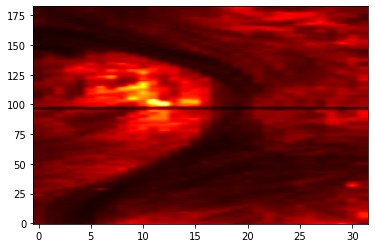

In [4]:
import matplotlib.pyplot as plt
plt.imshow(frame,aspect='auto', origin='lower',interpolation=None,cmap='hot')

In [5]:
### Find FL threshold using frame_linear hist  
# frame=frame*1e7
frame_linear=np.reshape(frame,-1)
n,x = np.histogram(frame_linear, bins = 70) # iteratively decided on 70 bins
bin_centers = 0.5*(x[1:]+x[:-1])
peaks, _ = find_peaks(-n) # find troughs
index=peaks[0] # since bin size is so big, first trough corresponds to post-FL dip.
thresh=bin_centers[index] # this is the bit I can edit to try and make it universal for different observations
thresh=np.floor(thresh)

In [6]:
print(thresh)

0.0


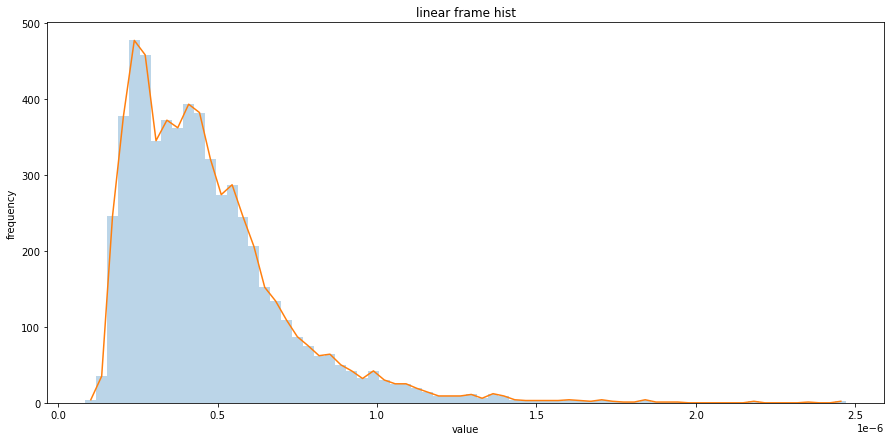

In [7]:
fig,ax=plt.subplots(figsize=(15,7))
ax.set(
    title='linear frame hist',
    xlabel='value',
    ylabel='frequency')
bin_number=int(np.floor(len(fram)))
ax.hist(frame_linear,bins=70,alpha=0.3);
ax.plot(bin_centers,n)

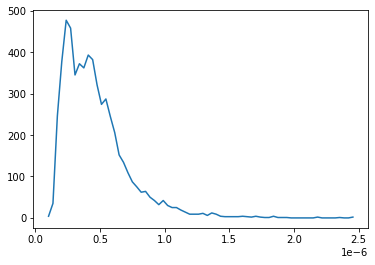

In [8]:
plt.plot(bin_centers,n)

In [9]:
### Find the two centre rows that correspond to nans
ncol=frame.shape[1]
centre_col=int(ncol/2)
slit_row=np.argmin(frame[:,centre_col])   

In [10]:
### Logically index to nan slit rows and everything thats's not FL 
# changed it to zeros instead of nans
frame[slit_row,:]=0 
frame[slit_row-1,:]=0 
frame[frame>thresh]=0

In [11]:
### Create binary mask array from np.isnan statements
mask_bin=np.where(frame>0,1,0)

if line is None:
    return mask_bin
else:

### Create binary border array
mask_bin_linear=np.reshape(mask_bin,-1)
left_border=[]
for ind, value in enumerate(mask_bin_linear):
    if (value==1) and (mask_bin_linear[ind-1]==0):
        left_border.append(1)
    else:
        left_border.append(0)       

right_border=[]        
for ind, value in enumerate(mask_bin_linear):
    if (value==0) and (mask_bin_linear[ind-1]==1):
        right_border.append(1)
    else:
        right_border.append(0)

total_border=[]
for ind,value in enumerate(left_border):
    dummy=[]
    dummy=left_border[ind]+right_border[ind]
    total_border.append(dummy)

border_linear=np.asarray(total_border) #convert list back to np.array
border_array=np.reshape(border_linear,(-1,ncol)) # reshape back to same shape as original frame
                           
### Convert binary border array into 2 seperte lists of x and y coords
container=[]
for i in range(ncol):
    row=[]
    for ind, val in enumerate(border_array[:,i]):
        if val==1:
            row.append(ind)
    container.append(row)   
x=[]
y=[] 
for col_number, row_vals in enumerate(container):
    for val in row_vals:
        y.append(val)
    col_dim=[col_number]*len(row_vals)
    for dim in col_dim:
        x.append(dim)

### Merge both lists into single list of coord tuples
merged_list = [(p1, p2) for idx1, p1 in enumerate(x)
for idx2, p2 in enumerate(y) if idx1 == idx2] 
coords=merged_list
                           
### Create line array by joining nearest coord tuples
alpha = 0.95 * alphashape.optimizealpha(coords)
hull = alphashape.alphashape(coords, alpha)
mask_line_array = hull.exterior.coords.xy
    
        

IndentationError: expected an indented block (<ipython-input-11-ba6fcfe00a83>, line 9)